# Mathematics for neural networks

# Векторы и матрицы

## Векторы
$$\mathbf{a, b} - \textrm{векторы}$$

$$\mathbf a = (a_1, a_2, a_3, \dots, a_n)$$
$$\mathbf b = (b_1, b_2, b_3, \dots, b_n)$$

Векторы (**одинаковой длины**) можно складывать:

$$\mathbf a + \mathbf b = c$$

$$\mathbf c = (a_1 + b_1, a_2 + b_2, a_3 + b_3, \dots, a_n + b_n)$$.

Для векторов (**одинаковой длины**) определено скалярное произведение:

$$\mathbf a \cdot \mathbf b \quad\textrm{или}\quad (\mathbf a,\mathbf b) = \sum_{i=1}^n a_i \cdot b_i$$

<br>
<br>

## Матрицы

$$\mathbf{A} = \begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}
\end{pmatrix}$$
<br>
$$\mathbf{B} = \begin{pmatrix}
b_{11} & b_{12} & b_{13}\\
b_{21} & b_{22} & b_{23}
\end{pmatrix}$$

У матриц есть размеры: кол-во строк и кол-во столбцов. Матрицы $\mathbf{A}$ и $\mathbf{B}$ имеют одинаковый размер (2,3). Такие матрицы можно складывать.

**Некоторые** матрицы можно перемножать. Чтобы $\mathbf{A} \cdot \mathbf{B}$ было определено, нужно чтобы размеры матриц были согласованы:

$$dim \mathbf A = (m,p),\quad dim \mathbf B = (p, q), \quad dim \mathbf C = (m,q)$$.

$$c_{ij} = \sum_{k=1}^p a_{ik}\cdot b_{kj}$$

**ВАЖНО**

Если определены произведения $\mathbf A \cdot \mathbf B$ и $\mathbf B \cdot \mathbf A$, то в общем случае **они не равны!**


In [1]:
import numpy as np

In [7]:
a = np.array([1, 2, 3, 2, 1])
b = np.array([4, 4, 2, 3, 1])

# scalar product
a @ b

25

In [8]:
A = np.array(
    [
        [1, 2, 1],
        [2, 4, 1],
        [5, 1, 2]
    ]
)

B = np.array(
    [
        [3, 2, 1],
        [2, 4, 5],
        [1, 1, 0],
    ]
)

In [10]:
# sum of matrices
A + B

array([[4, 4, 2],
       [4, 8, 6],
       [6, 2, 2]])

In [11]:
A @ B

array([[ 8, 11, 11],
       [15, 21, 22],
       [19, 16, 10]])

In [12]:
B @ A

array([[12, 15,  7],
       [35, 25, 16],
       [ 3,  6,  2]])

# Линейная регрессия

Дано: данные в виде пар чисел (X, y).

Требуется: найти наилучшую зависимость вида $y = WX + b.$

<br>

**Почему зависимость именно такого вида?**

**Как решать подобную задачу?**

**Как понять, какая зависимость лучшая?**



In [26]:
X = np.random.randn(100)
y = X * 0.5+ 0.2*np.random.randn(100) - 20

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

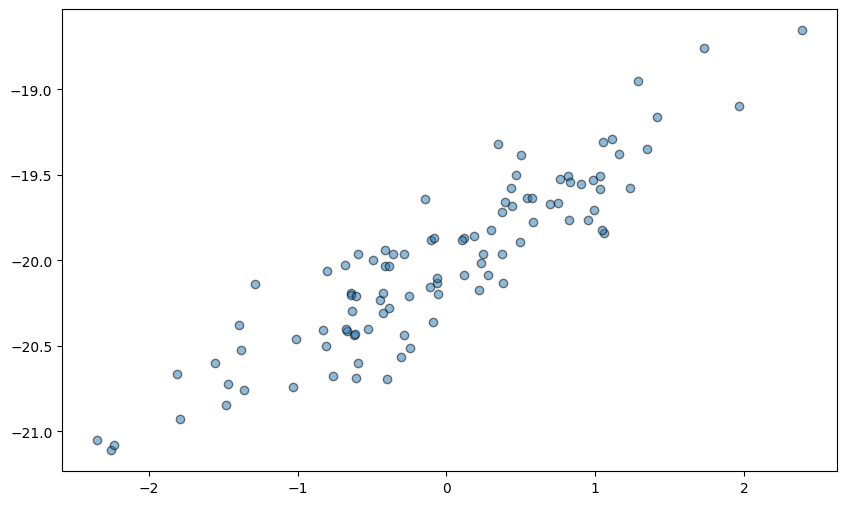

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, edgecolor='black')
plt.show()

In [33]:
class LinearModel:
    def __init__(self, k: float, b: float):
        self.k = k
        self.b = b

    def predict(self, X):
        return X * self.k + self.b

In [ ]:
class LogisticRegression:
    def __init__(self, w: np.array, b: float):
        self.w = w
        self.b = b

    def predict(self, X):
        # sigmoid of linear part
        pass

In [56]:
def mse(y_pred, y_true):
    return np.mean(np.square((y_pred - y_true)))

### алгоритм градиентного спуска

In [66]:
def derivative_k(k, b, y_pred, y_true, x):
    return np.mean(2 * (y_pred - y_true) * x)

def derivative_b(k, b, y_pred, y_true, x):
    return np.mean(2 * (y_pred - y_true))

In [64]:
model = LinearModel(0, 0)
mse_history = []
for i in range(200):
    y_pred = model.predict(X)
    new_k = model.k - 0.05*derivative_k(model.k, model.b, y_pred, y, X)
    new_b = model.b - 0.05*derivative_b(model.k, model.b, y_pred, y, X)
    model.k = new_k
    model.b = new_b
    #print(new_k, new_b)
    #print(mse(y_pred, y))
    mse_history.append(mse(y_pred, y))


In [38]:
mse(model.predict(X), y)

400.91005234370937

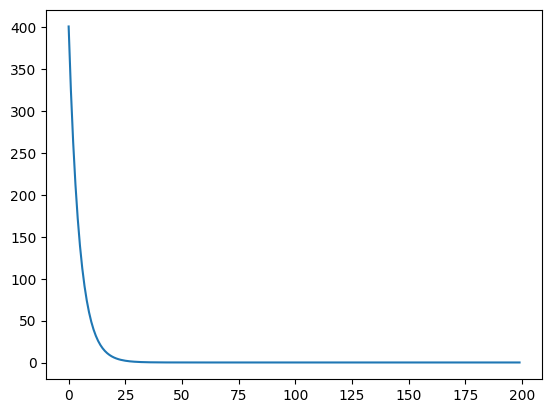

In [65]:
plt.plot(mse_history)

## Минимизация функций

Пусть есть функция (**дифференцируемая**) $y = f(w)$.

Тогда у нее существует производная $\frac{dy}{dw}$, причем если в точке $w_0$ она положительна, то функция растет (в окрестности этой точки). Верно также и обратное.

Для функции многих переменных понятие производной обобщается до понятия градиента - вектора, состоящего из всех частных производных (здесь и далее мы подразумеваем, что функция дифференцируема в смысле многих переменных).

$$y = f(\mathbf{w}), \quad \mathbf w = (w_1, w_2, \dots, w_m)$$

$$\nabla y = (\frac{\partial y}{\partial w_1}, \frac{\partial y}{\partial w_2}, \frac{\partial y}{\partial w_3}, \dots, \frac{\partial y}{\partial w_m})$$

Вектор $\nabla y$ называется градиентом $y$.

В каждой точке такой функции вектор градиента указывает, куда надо двигаться, чтобы функция $y$ возрастала.

### Примеры

$y = a + b$

$y = a^2 \cdot b$

Задание: посчитать градиенты этих функций.

In [67]:
def sigmoid(x):
    return 1/ (np.exp(-x) + 1)

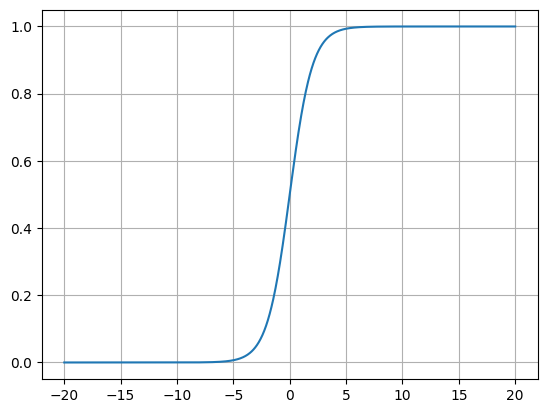

In [70]:
plt.plot(np.linspace(-20,20, 1000), sigmoid(np.linspace(-20,20, 1000)))
plt.grid()